# Viral Tweets

Using K-Nearest Neighbor algorithm to predict whether a tweet will go viral. 
Input file : random_tweets.json

In [8]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]['user']['location'])
print(all_tweets.loc[0]['user'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 21

# Defining Viral Tweets

1) Identifying the median
2) Defining if a tweet is viral based on this median

In [10]:
import numpy as np


print(all_tweets['retweet_count'].median())
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 13, 1, 0)

print(all_tweets.is_viral.value_counts())

13.0
0    5562
1    5537
Name: is_viral, dtype: int64


# Making Features

Working on 3 features to identify if we can predict the "virality" of a tweet.

* The number of followers
* The number of links in the tweet
* The average length of the words in the tweet.

In [13]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

all_tweets['followers_count'] = all_tweets.apply((lambda tweet: tweet['user']['followers_count']), axis=1)

all_tweets['friends_count'] = all_tweets.apply((lambda tweet: tweet['user']['friends_count']), axis=1)


# Normalizing The Data


In [16]:
from sklearn.preprocessing import scale

labels = all_tweets[['is_viral']] 
data = all_tweets[['tweet_length', 'followers_count', 'friends_count']]

scaled_data = scale(data, axis = 0)
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


# Creating the Training Set and Test Set


In [17]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_labels, validation_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

# Using the Classifier

Starting with  k = 5, and adapt later when finding the best k (next steps)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=47)
classifier.fit(train_data, train_labels)
print(classifier.score(validation_data, validation_labels))

0.6171171171171171


# Choosing K


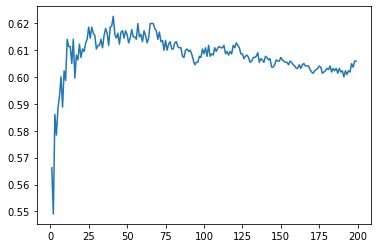

In [21]:
import matplotlib.pyplot as plt

def generate_liste_k():
    liste = []
    for i in range(1,200):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(train_data, train_labels)
        score = classifier.score(validation_data, validation_labels)
        liste.append(score)
    return liste

y = generate_liste_k()
x = range(1,200)
plt.plot(x,y)
plt.show()